# iGEM22 | JUMP LVL2 DV PCN Comparison Project | Factors: PCN | Date: 25.00.2022
author: Camillo Moschner

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os

from ipywidgets import interact 

# Function Defintions

In [2]:
def divide_chunks(l, n):
    """Break a list into chunks of size N in Python (https://www.geeksforgeeks.org/break-list-chunks-size-n-python/) 
    """
    result_l = []
    for i in range(0, len(l), n):
        result_l.append(l[i:i + n])
    return result_l

## Load Plate Data

In [3]:
FI_gain800_df = pd.read_csv(f"DATA{os.path.sep}220925_cm967_protocol1_sfGFPgain800.csv",index_col=0)
OD600_df = pd.read_csv(f"DATA{os.path.sep}220925_cm967_protocol2_OD600.csv",index_col=0)
OD800_df = pd.read_csv(f"DATA{os.path.sep}220925_cm967_protocol2_OD800.csv",index_col=0)

In [4]:
empty_well_list = []

In [5]:
FI_gain800_df.index = FI_gain800_df.index/60
OD600_df.index = OD600_df.index/60
OD800_df.index = OD800_df.index/60
# remove empty wells
FI_gain800_df.drop(columns=empty_well_list,inplace=True)
OD600_df.drop(columns=empty_well_list,inplace=True)
OD800_df.drop(columns=empty_well_list,inplace=True)

## Load Plate Encryption

In [6]:
plate_decryption_df = pd.read_csv(f"experimental_plan{os.path.sep}220925_decryption_spreadsheet.csv",index_col=0)
#plate_layout_df = pd.read_csv(f"experimental_plan{os.path.sep}220906_iGEM22_sfGFPcharact_test1_plate_layout.csv",index_col=0)

In [7]:
# remove empty wells
plate_decryption_df = plate_decryption_df.T.drop(columns=empty_well_list).T

In [8]:
plate_decryption_df

,cells,host,samples,media,abx_c,replicate,ID,media_source,sample_source,destination,prep_date,samples_id
A01,n,NaN,NTC,EZRDM,0ug,0,NTC|0ug|0,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,A1 of 3 on Temperature Module GEN2 on 3,2022-09-24,NTC|0ug
B01,n,NaN,NTC,EZRDM,0ug,1,NTC|0ug|1,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,B1 of 3 on Temperature Module GEN2 on 3,2022-09-24,NTC|0ug
C01,n,NaN,NTC,EZRDM,0ug,2,NTC|0ug|2,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,C1 of 3 on Temperature Module GEN2 on 3,2022-09-24,NTC|0ug
D01,y,DH5a,just_cells,EZRDM,0ug,0,just_cells|0ug|0,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,B1 of Opentrons 96 Well Aluminum Block with Ge...,D1 of 3 on Temperature Module GEN2 on 3,2022-09-24,just_cells|0ug
E01,y,DH5a,just_cells,EZRDM,0ug,1,just_cells|0ug|1,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,B1 of Opentrons 96 Well Aluminum Block with Ge...,E1 of 3 on Temperature Module GEN2 on 3,2022-09-24,just_cells|0ug
...,...,...,...,...,...,...,...,...,...,...,...,...
D12,y,DH5a,pJUMP48-2A(pUC),EZRDM,75ug,1,pJUMP48-2A(pUC)|75ug|1,B2 of Opentrons 6 Tube Rack with Falcon 50 mL ...,H1 of Opentrons 96 Well Aluminum Block with Ge...,D12 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP48-2A(pUC)|75ug
E12,y,DH5a,pJUMP48-2A(pUC),EZRDM,75ug,2,pJUMP48-2A(pUC)|75ug|2,B2 of Opentrons 6 Tube Rack with Falcon 50 mL ...,H1 of Opentrons 96 Well Aluminum Block with Ge...,E12 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP48-2A(pUC)|75ug
F12,y,DH5a,pJUMP48-2A(pUC),EZRDM,100ug,0,pJUMP48-2A(pUC)|100ug|0,A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...,H1 of Opentrons 96 Well Aluminum Block with Ge...,F12 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP48-2A(pUC)|100ug
G12,y,DH5a,pJUMP48-2A(pUC),EZRDM,100ug,1,pJUMP48-2A(pUC)|100ug|1,A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...,H1 of Opentrons 96 Well Aluminum Block with Ge...,G12 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP48-2A(pUC)|100ug


In [18]:
# split data by sample
data_by_sample_dict = {}
for sample in plate_decryption_df['samples'].unique():
    data_by_sample_dict[sample] = plate_decryption_df.loc[plate_decryption_df['samples']==sample]
# split data by concentration
data_by_conc_dict = {}
for conc in plate_decryption_df['abx_c'].unique():
    data_by_conc_dict[conc] = plate_decryption_df.loc[plate_decryption_df['abx_c']==conc]

In [10]:
plate_decryption_df['samples_id']=plate_decryption_df.samples+'|'+plate_decryption_df.abx_c#.head(20)

In [11]:
plate_decryption_df#.to_csv(f"experimental_plan{os.path.sep}220925_decryption_spreadsheet.csv")#.index = [x[0]+x[1:].zfill(2) for x in plate_decryption_df.index]

,cells,host,samples,media,abx_c,replicate,ID,media_source,sample_source,destination,prep_date,samples_id
A01,n,NaN,NTC,EZRDM,0ug,0,NTC|0ug|0,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,A1 of 3 on Temperature Module GEN2 on 3,2022-09-24,NTC|0ug
B01,n,NaN,NTC,EZRDM,0ug,1,NTC|0ug|1,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,B1 of 3 on Temperature Module GEN2 on 3,2022-09-24,NTC|0ug
C01,n,NaN,NTC,EZRDM,0ug,2,NTC|0ug|2,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,C1 of 3 on Temperature Module GEN2 on 3,2022-09-24,NTC|0ug
D01,y,DH5a,just_cells,EZRDM,0ug,0,just_cells|0ug|0,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,B1 of Opentrons 96 Well Aluminum Block with Ge...,D1 of 3 on Temperature Module GEN2 on 3,2022-09-24,just_cells|0ug
E01,y,DH5a,just_cells,EZRDM,0ug,1,just_cells|0ug|1,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,B1 of Opentrons 96 Well Aluminum Block with Ge...,E1 of 3 on Temperature Module GEN2 on 3,2022-09-24,just_cells|0ug
...,...,...,...,...,...,...,...,...,...,...,...,...
D12,y,DH5a,pJUMP48-2A(pUC),EZRDM,75ug,1,pJUMP48-2A(pUC)|75ug|1,B2 of Opentrons 6 Tube Rack with Falcon 50 mL ...,H1 of Opentrons 96 Well Aluminum Block with Ge...,D12 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP48-2A(pUC)|75ug
E12,y,DH5a,pJUMP48-2A(pUC),EZRDM,75ug,2,pJUMP48-2A(pUC)|75ug|2,B2 of Opentrons 6 Tube Rack with Falcon 50 mL ...,H1 of Opentrons 96 Well Aluminum Block with Ge...,E12 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP48-2A(pUC)|75ug
F12,y,DH5a,pJUMP48-2A(pUC),EZRDM,100ug,0,pJUMP48-2A(pUC)|100ug|0,A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...,H1 of Opentrons 96 Well Aluminum Block with Ge...,F12 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP48-2A(pUC)|100ug
G12,y,DH5a,pJUMP48-2A(pUC),EZRDM,100ug,1,pJUMP48-2A(pUC)|100ug|1,A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...,H1 of Opentrons 96 Well Aluminum Block with Ge...,G12 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP48-2A(pUC)|100ug


## Plotting Growth

In [12]:
plate_decryption_df['samples'].unique()
data_by_sample_dict.keys()

dict_keys(['NTC', 'just_cells', 'LVL2_NTC', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)', 'pJUMP46-2A(p15A)', 'pJUMP44-2A(pRO1600-ColE1)', 'pJUMP48-2A(pUC)'])

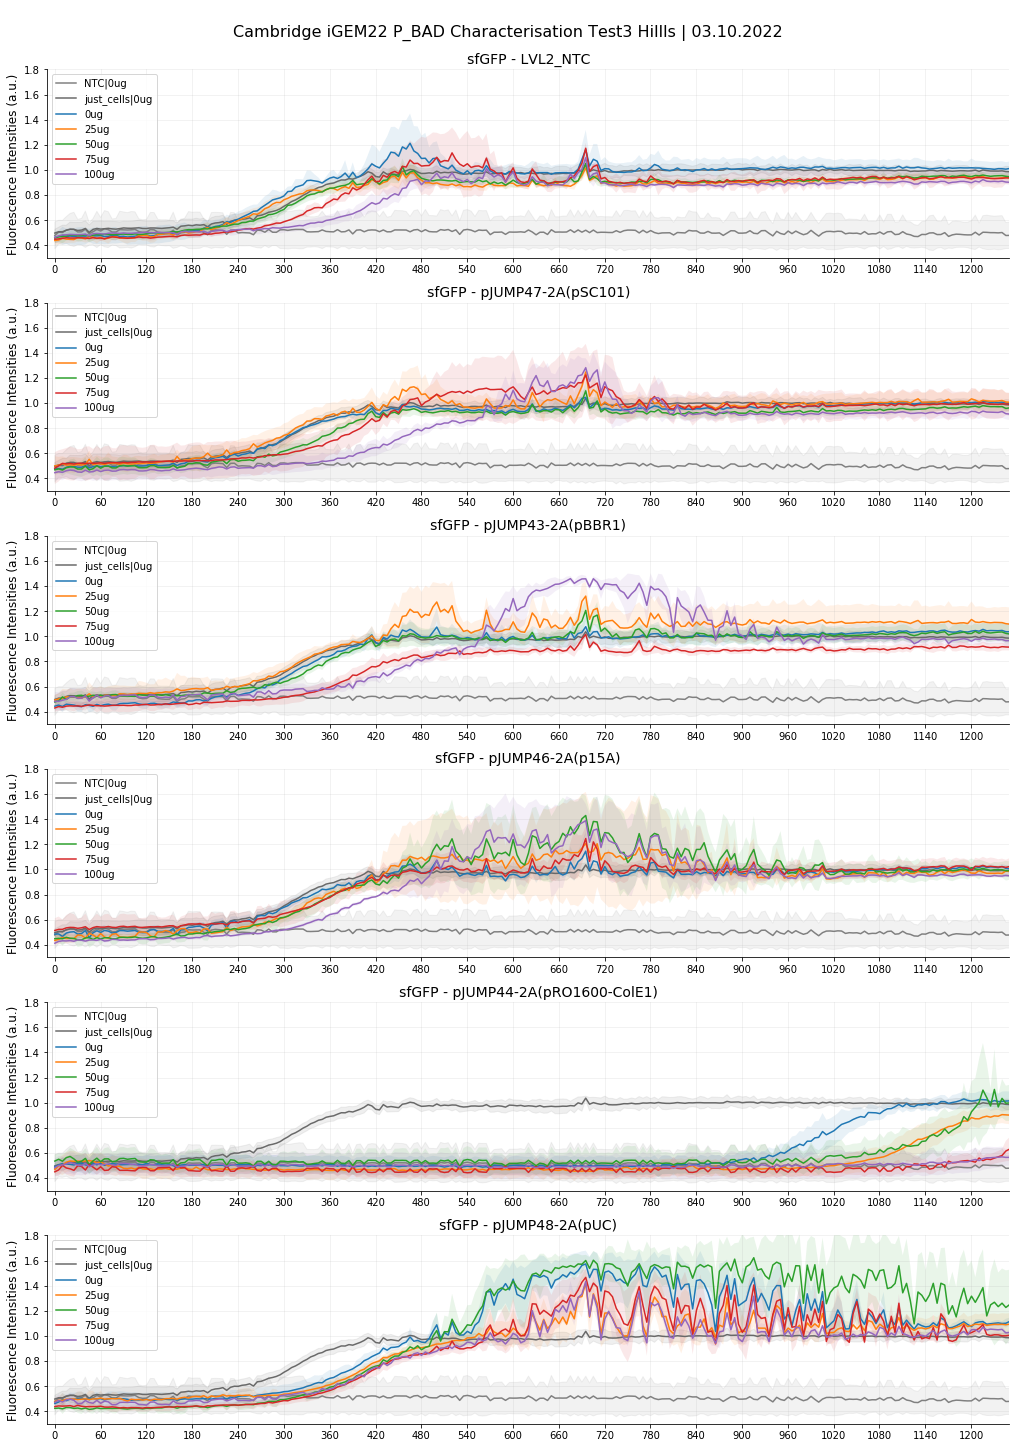

In [13]:
fig = plt.figure(figsize=(14,20), constrained_layout=True)
gs = gridspec.GridSpec(len(data_by_sample_dict.keys())-2,1, figure=fig)
plt.suptitle(f"\nCambridge iGEM22 P_BAD Characterisation Test3 Hillls | 03.10.2022",size=16)
plot_row = 0

test_df = OD800_df #FI_gain800_df | OD600_df
# loop 1 - through samples
for sample_idx, sample_id in enumerate(plate_decryption_df['samples'].unique()[2:]):
    ax1= fig.add_subplot(gs[plot_row,0])
    # plot negative controls -------------------------------------------------------
    for unique_sample in plate_decryption_df.loc[(plate_decryption_df.samples=='NTC')].samples_id.unique():
        run_replicate_wells = plate_decryption_df.loc[plate_decryption_df.samples_id==unique_sample].index
        current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples_id']
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{current_sample_name}",color='grey') # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1,color='grey')
    # plot negative controls -------------------------------------------------------
    # plot negative controls -------------------------------------------------------
    for unique_sample in plate_decryption_df.loc[(plate_decryption_df.samples=='just_cells')].samples_id.unique():
        run_replicate_wells = plate_decryption_df.loc[plate_decryption_df.samples_id==unique_sample].index
        current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples_id']
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{current_sample_name}",color='dimgray') # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1,color='dimgray')
    # plot negative controls -------------------------------------------------------
    # loop 2 - through replicates
    for unique_sample in data_by_sample_dict[sample_id].samples_id.unique():
        run_replicate_wells = data_by_sample_dict[sample_id].loc[data_by_sample_dict[sample_id].samples_id==unique_sample].index
        current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples_id']
    #for run_replicate_wells in divide_chunks( data_by_sample_dict[sample_id].index, 3 ):
        replicate_no = 3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{current_sample_name.split('|')[1]}") # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)
#         ax1.set_title(f"Growth Curves - {sample_id}",size=14)
#         ax1.set_ylabel("$OD_{600}$",size=12)
        ax1.set_ylim([0.3,1.8])
        ax1.set_title(f"sfGFP - {sample_id}",size=14)
        ax1.set_ylabel("Fluorescence Intensities (a.u.)",size=12)
        #ax1.set_ylim([0.1,45_000])
        if sample_id == plate_decryption_df['samples_id'].unique()[2:][-1]:
            ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+60, 60.0))
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)
    
    plot_row+=1

#plt.savefig("221003_iGEM22_PBADcharact_test3_Hills_growth_curves.png", dpi=300)
#plt.savefig("221003_iGEM22_PBADcharact_test3_Hills_mVenus_gain2000.png", dpi=300)

In [15]:
plate_decryption_df

,cells,host,samples,media,abx_c,replicate,ID,media_source,sample_source,destination,prep_date,samples_id
A01,n,NaN,NTC,EZRDM,0ug,0,NTC|0ug|0,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,A1 of 3 on Temperature Module GEN2 on 3,2022-09-24,NTC|0ug
B01,n,NaN,NTC,EZRDM,0ug,1,NTC|0ug|1,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,B1 of 3 on Temperature Module GEN2 on 3,2022-09-24,NTC|0ug
C01,n,NaN,NTC,EZRDM,0ug,2,NTC|0ug|2,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,C1 of 3 on Temperature Module GEN2 on 3,2022-09-24,NTC|0ug
D01,y,DH5a,just_cells,EZRDM,0ug,0,just_cells|0ug|0,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,B1 of Opentrons 96 Well Aluminum Block with Ge...,D1 of 3 on Temperature Module GEN2 on 3,2022-09-24,just_cells|0ug
E01,y,DH5a,just_cells,EZRDM,0ug,1,just_cells|0ug|1,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,B1 of Opentrons 96 Well Aluminum Block with Ge...,E1 of 3 on Temperature Module GEN2 on 3,2022-09-24,just_cells|0ug
...,...,...,...,...,...,...,...,...,...,...,...,...
D12,y,DH5a,pJUMP48-2A(pUC),EZRDM,75ug,1,pJUMP48-2A(pUC)|75ug|1,B2 of Opentrons 6 Tube Rack with Falcon 50 mL ...,H1 of Opentrons 96 Well Aluminum Block with Ge...,D12 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP48-2A(pUC)|75ug
E12,y,DH5a,pJUMP48-2A(pUC),EZRDM,75ug,2,pJUMP48-2A(pUC)|75ug|2,B2 of Opentrons 6 Tube Rack with Falcon 50 mL ...,H1 of Opentrons 96 Well Aluminum Block with Ge...,E12 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP48-2A(pUC)|75ug
F12,y,DH5a,pJUMP48-2A(pUC),EZRDM,100ug,0,pJUMP48-2A(pUC)|100ug|0,A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...,H1 of Opentrons 96 Well Aluminum Block with Ge...,F12 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP48-2A(pUC)|100ug
G12,y,DH5a,pJUMP48-2A(pUC),EZRDM,100ug,1,pJUMP48-2A(pUC)|100ug|1,A3 of Opentrons 6 Tube Rack with Falcon 50 mL ...,H1 of Opentrons 96 Well Aluminum Block with Ge...,G12 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP48-2A(pUC)|100ug


In [16]:
plate_decryption_df['abx_c'].unique()

array(['0ug', '25ug', '50ug', '75ug', '100ug'], dtype=object)

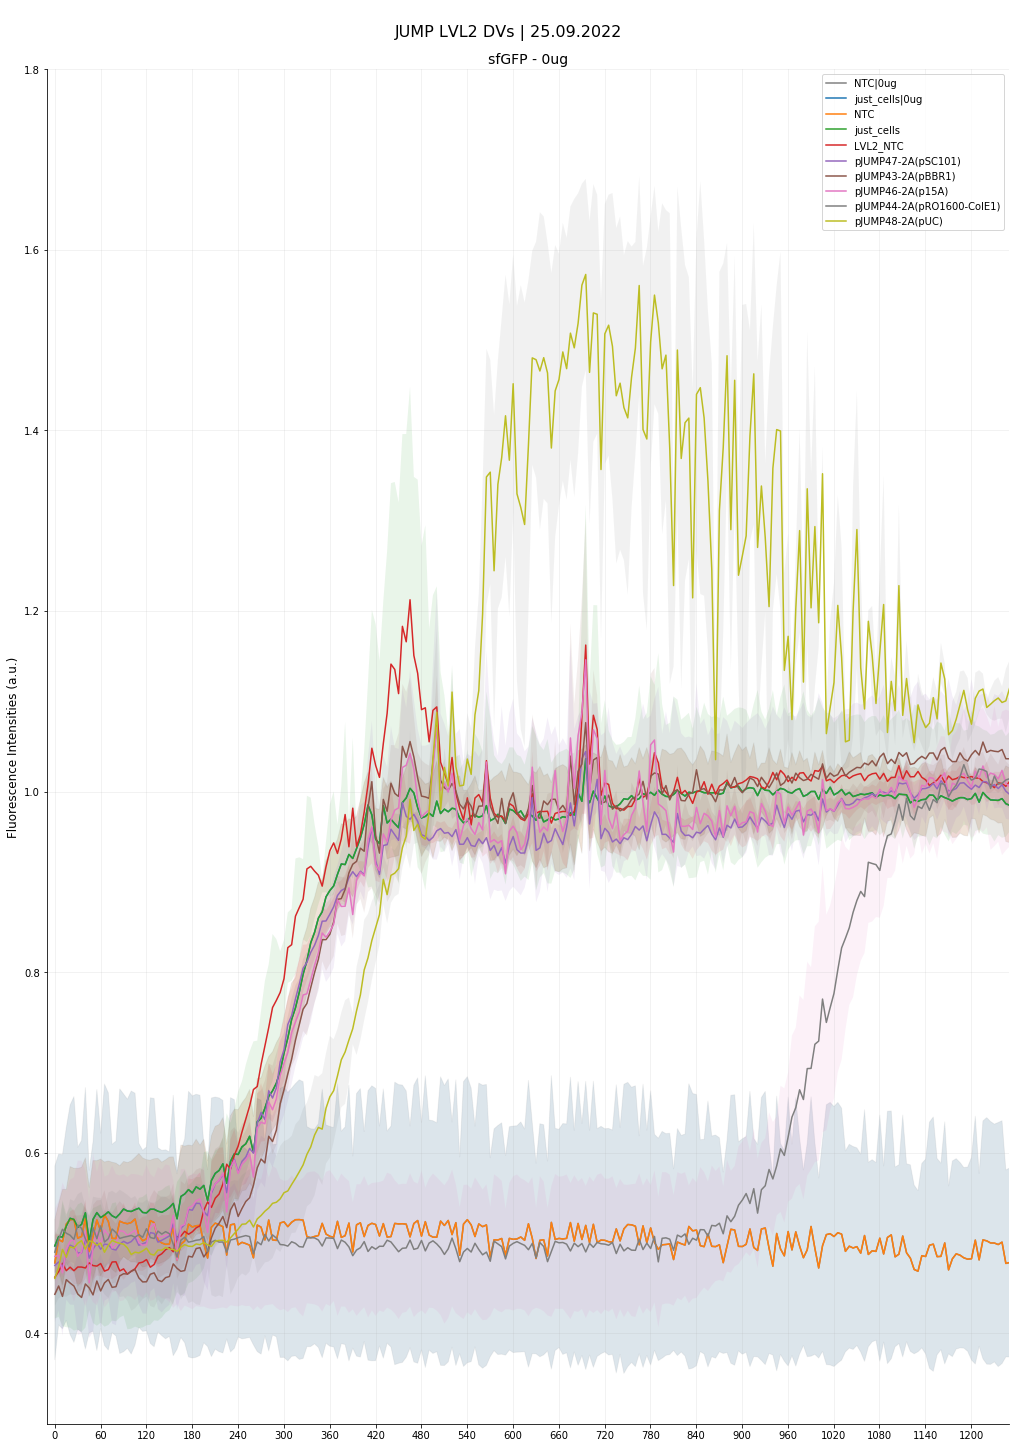

In [27]:
fig = plt.figure(figsize=(14,20), constrained_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig) #len(data_by_conc_dict.keys()[:1])
plt.suptitle(f"\nJUMP LVL2 DVs | 25.09.2022",size=16)
plot_row = 0

test_df = OD800_df #FI_gain800_df | OD600_df
# loop 1 - through samples
for sample_idx, sample_id in enumerate(plate_decryption_df['abx_c'].unique()[:1]):
    ax1= fig.add_subplot(gs[plot_row,0])
    # plot negative controls -------------------------------------------------------
    for unique_sample in plate_decryption_df.loc[(plate_decryption_df.samples=='NTC')].samples_id.unique():
        run_replicate_wells = plate_decryption_df.loc[plate_decryption_df.samples_id==unique_sample].index
        current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples_id']
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{current_sample_name}",color='grey') # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1,color='grey')
    # plot negative controls -------------------------------------------------------
    # plot negative controls -------------------------------------------------------
    for unique_sample in plate_decryption_df.loc[(plate_decryption_df.samples=='just_cells')].samples_id.unique():
        run_replicate_wells = plate_decryption_df.loc[plate_decryption_df.samples_id==unique_sample].index
        current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples_id']
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{current_sample_name}")#,color='dimgray') # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1,color='dimgray')
    # plot negative controls -------------------------------------------------------
    # loop 2 - through replicates
    for unique_sample in data_by_conc_dict[sample_id].samples_id.unique():
        run_replicate_wells = data_by_conc_dict[sample_id].loc[data_by_conc_dict[sample_id].samples_id==unique_sample].index
        current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples']
    #for run_replicate_wells in divide_chunks( data_by_sample_dict[sample_id].index, 3 ):
        replicate_no = 3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{current_sample_name}") # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)
#         ax1.set_title(f"Growth Curves - {sample_id}",size=14)
#         ax1.set_ylabel("$OD_{600}$",size=12)
        ax1.set_ylim([0.3,1.8])
        ax1.set_title(f"sfGFP - {sample_id}",size=14)
        ax1.set_ylabel("Fluorescence Intensities (a.u.)",size=12)
        #ax1.set_ylim([0.1,45_000])
        if sample_id == plate_decryption_df['samples_id'].unique()[2:][-1]:
            ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+60, 60.0))
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)
    
    plot_row+=1

#plt.savefig("221003_iGEM22_PBADcharact_test3_Hills_growth_curves.png", dpi=300)
#plt.savefig("221003_iGEM22_PBADcharact_test3_Hills_mVenus_gain2000.png", dpi=300)

In [14]:
plate_decryption_df.T[['F03', 'G03', 'H03']].T

,cells,host,samples,media,abx_c,replicate,ID,media_source,sample_source,destination,prep_date,samples_id
F03,y,DH5a,pJUMP47-2A(pSC101),EZRDM,0ug,0,pJUMP47-2A(pSC101)|0ug|0,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,D1 of Opentrons 96 Well Aluminum Block with Ge...,F3 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP47-2A(pSC101)|0ug
G03,y,DH5a,pJUMP47-2A(pSC101),EZRDM,0ug,1,pJUMP47-2A(pSC101)|0ug|1,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,D1 of Opentrons 96 Well Aluminum Block with Ge...,G3 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP47-2A(pSC101)|0ug
H03,y,DH5a,pJUMP47-2A(pSC101),EZRDM,0ug,2,pJUMP47-2A(pSC101)|0ug|2,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,D1 of Opentrons 96 Well Aluminum Block with Ge...,H3 of 3 on Temperature Module GEN2 on 3,2022-09-24,pJUMP47-2A(pSC101)|0ug


## Hill Plots

In [61]:
from scipy.optimize import curve_fit
import sympy as sy

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

# def func(x, a, b, c): # Hill sigmoidal equation from zunzun.com
#     return  a * np.power(x, b) / (np.power(c, b) + np.power(x, b))

def sigmoid_function(xdata, x0, k):
    y = np.exp(-k*(xdata-x0)) / (1 + np.exp(-k*(xdata-x0)))
    return y

# def sigmoid_derivative(x, x0, k):
#     f = np.exp(-k*(x-x0))
#     return -k / f

In [70]:
color_list = sns.color_palette("tab10",len(plate_decryption_df.samples_id.unique()))
color_list_two = sns.color_palette("tab10",len(plate_decryption_df.samples_id.unique())+1)

In [167]:
plate_decryption_df['samples'].unique()[3:-1][-1]

'PB10'

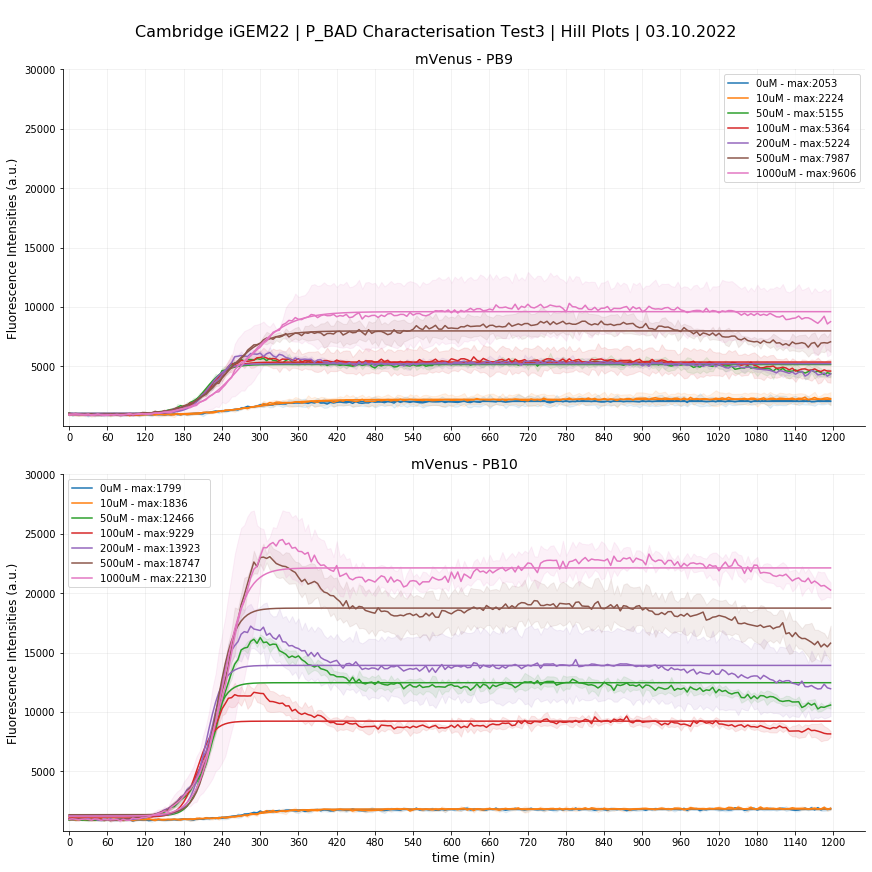

In [177]:
fig = plt.figure(figsize=(12,12), constrained_layout=True)
gs = gridspec.GridSpec(len(data_by_sample_dict.keys())-4,1, figure=fig)
plt.suptitle(f"\nCambridge iGEM22 | P_BAD Characterisation Test3 | Hill Plots | 03.10.2022",size=16)
plot_row = 0

test_df = FI_gain2000_df #FI_gain2000_df | OD600_df
summary_data = []
# loop 1 - through samples
for sample_idx, sample_id in enumerate(plate_decryption_df['samples'].unique()[3:-1]):
    ax1= fig.add_subplot(gs[plot_row,0])
    samples_list, growth_rate_dt_list, std_growth_rate_list = [], [], []
    midpoint_list, max_expression_l = [], []
    popt_list = []
    # plot negative controls -------------------------------------------------------
    # loop 2 - through replicates
    for idx, unique_sample in enumerate(data_by_sample_dict[sample_id].samples_id.unique()):
        run_replicate_wells = data_by_sample_dict[sample_id].loc[data_by_sample_dict[sample_id].samples_id==unique_sample].index
        current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples_id']
    #for run_replicate_wells in divide_chunks( data_by_sample_dict[sample_id].index, 3 ):
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1, data = y,color=color_list[idx])#, label=f"{current_sample_name}") # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1,color=color_list[idx],)
        
        # curve fit (excluding medium negative control)
    #if idx!=0:
        p0 = [max(y), np.median(x),1,min(y)] # this is an mandatory initial guess
        popt, pcov = curve_fit(sigmoid, x, y, p0)#, method='lm')
        # save fitted curve stats
        samples_list.append(current_sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
        midpoint_list.append(popt[1]), max_expression_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
        popt_list.append(popt)
        plt.plot(x, sigmoid(x, *popt), label=f"{current_sample_name.split('|')[1]} - max:{int(popt[0]+popt[3])}",color=color_list_two[idx],)# - $t_{'D'}$={round(np.log(2)/popt[2],1)}min")#, color=color_list_two[idx])

#         ax1.set_title(f"Growth Curves - {sample_id}",size=14)
#         ax1.set_ylabel("$OD_{600}$",size=12)
#         ax1.set_ylim([0.3,1.8])
        ax1.set_title(f"mVenus - {sample_id}",size=14)
        ax1.set_ylabel("Fluorescence Intensities (a.u.)",size=12)
        ax1.set_ylim([0.1,30_000])
        if sample_id == plate_decryption_df['samples'].unique()[3:-1][-1]:
            ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+60, 60.0))
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)
        plt.legend()
    
    plot_row+=1
    summary_data.append([samples_list, growth_rate_dt_list, std_growth_rate_list, midpoint_list, max_expression_l])

#plt.savefig("221003_iGEM22_PBADcharact_test3_Hills_growth_curves.png", dpi=300)
#plt.savefig("221003_iGEM22_PBADcharact_test3_Hills_mVenus_gain2000.png", dpi=300)

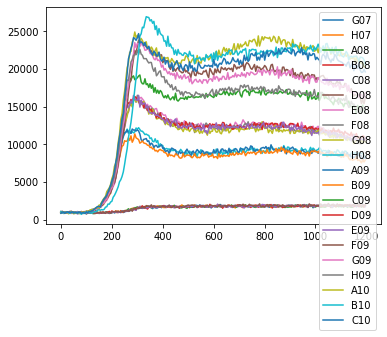

In [159]:
FI_gain2000_df[plate_decryption_df.loc[plate_decryption_df.samples=='PB10'].index].plot()

In [162]:
PB10_data = pd.DataFrame(summary_data[1]).T
PB10_data.columns = ['constructs','dt_gr','std_dt_gr','midpoint','max_expression']
PB10_data['inducer_c'] = PB10_data.constructs.apply(lambda x: int(x.split('|')[1].split('uM')[0]))

In [163]:
PB10_data#.loc[3,'max_expression'] = 11225.544003750421

,constructs,dt_gr,std_dt_gr,midpoint,max_expression,inducer_c
0,Marionette|0uM,0.033652,0.002062,275.676756,877.94923,0
1,Marionette|10uM,0.02922,0.001868,287.723368,899.713355,10
2,Marionette|50uM,0.078408,0.011295,217.510829,11225.544004,50
3,Marionette|100uM,0.08015,0.010214,201.033224,8074.94722,100
4,Marionette|200uM,0.077663,0.008566,215.58644,12654.340211,200
5,Marionette|500uM,0.06842,0.007327,230.613156,17394.486839,500
6,Marionette|1000uM,0.053039,0.002568,239.166101,20892.440905,1000


In [139]:
#np.log10(PB10_data.max_expression)
[np.log(x) for x in PB10_data.max_expression]

[6.777588767789604,
 6.802076217857142,
 8.996521611861278,
 9.325947175021916,
 9.44575553500755,
 9.763908586666663,
 9.947142693345025]

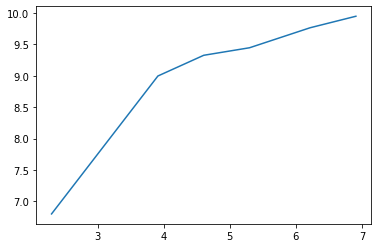

In [140]:
plt.plot(np.log(PB10_data.inducer_c), [np.log(x) for x in PB10_data.max_expression])

/Users/camillomoschner/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


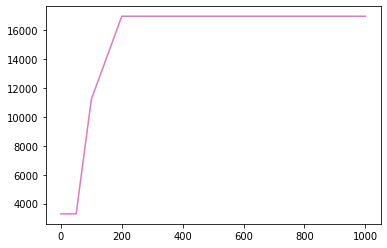

In [124]:
p0 = [max(PB10_data.max_expression), np.median(PB10_data.inducer_c),1,min(PB10_data.max_expression)] # this is an mandatory initial guess
popt, pcov = curve_fit(sigmoid, PB10_data.inducer_c, PB10_data.max_expression, p0)#, method='lm')
# save fitted curve stats
# samples_list.append(current_sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
# midpoint_list.append(popt[1]), max_expression_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
# popt_list.append(popt)
plt.plot(PB10_data.inducer_c, sigmoid(PB10_data.inducer_c, *popt), label=f"{current_sample_name} - IP:{round(popt[1],1)}min",color=color_list_two[idx],)# - $t_{'D'}$={round(np.log(2)/popt[2],1)}min")#, color=color_list_two[idx])


In [125]:
[x for x in popt]

[13696.219368502181, 99.67796588624344, 1.0, 3284.2032832492114]

In [76]:
renaming_dict = dict(zip(plate_decryption_df.name.unique(), ['empty NC','DH5⍺ NC','LVL1 NC', 'pSC101', 'pBBR1', 'pUC']))
renaming_dict

{'no cells': 'empty NC',
 'just cells': 'DH5⍺ NC',
 'lvl1': 'LVL1 NC',
 'pSC101, low copy no.': 'pSC101',
 'pBBR1, low/med copy no.': 'pBBR1',
 'pUC, high copy no.': 'pUC'}

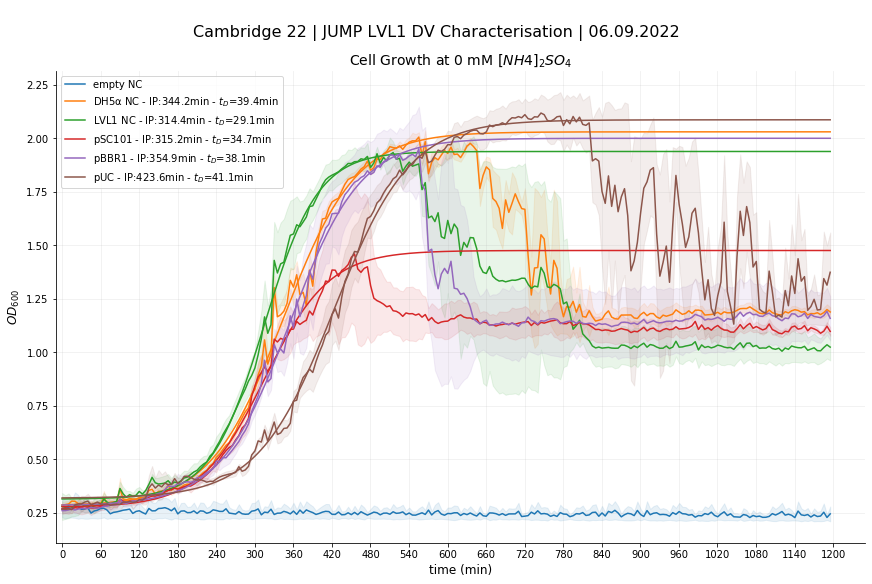

In [80]:
fig = plt.figure(figsize=(12,8), constrained_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
plt.suptitle(f"\nCambridge 22 | JUMP LVL1 DV Characterisation | 06.09.2022",size=16)
ax1= fig.add_subplot(gs[0,0])

test_df = OD600_df
samples_list, growth_rate_dt_list, std_growth_rate_list = [], [], []
midpoint_list, carrying_capacity_l = [], []
popt_list = []

replicate_no = 3
conc = 0
for idx, run_replicate_wells in enumerate(divide_chunks( data_by_am_c_dict[conc].index, replicate_no )[:]):
    xdata= test_df[run_replicate_wells].index
    ydata= test_df[run_replicate_wells].mean(axis=1)
    variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
    xdata_fit = ydata[:ydata.idxmax()].index
    ydata_fit = ydata[:ydata.idxmax()]
    sample_name = renaming_dict[plate_decryption_df.loc[run_replicate_wells[0],'name']]
    # 1- average line plot
    if idx==0:
        sns.lineplot(ax = ax1,
                     data = ydata, color=color_list[idx], label=f"{sample_name}") # 1.95 * np.std(y)/np.sqrt(len(x))
    else:
        sns.lineplot(ax = ax1,
                     data = ydata, color=color_list[idx])
    # 2- confidence interval
    ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
    ax1.fill_between(xdata, (ydata-ci), (ydata+ci), alpha=.1, color=color_list[idx])
    # curve fit (excluding medium negative control)
    if idx!=0:
        p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is an mandatory initial guess
        popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
        # save fitted curve stats
        samples_list.append(sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
        midpoint_list.append(popt[1]), carrying_capacity_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
        popt_list.append(popt)
        plt.plot(xdata, sigmoid(xdata, *popt), label=f"{sample_name} - IP:{round(popt[1],1)}min - $t_{'D'}$={round(np.log(2)/popt[2],1)}min", color=color_list_two[idx])

    ax1.set_title(f"Cell Growth at {conc} mM $[NH4]_{2}$$SO_{4}$",size=14)
    ax1.set_ylabel("$OD_{600}$",size=12)
    ax1.set_xlabel(f"time (min)",size=12)
    plt.xticks(np.arange(min(x), max(x)+60, 60.0))
    #ax1.set_ylim([0.1,2.6])
    ax1.set_xlim([-10,1250])
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    plt.grid(True,alpha=0.2)
    plt.legend()
    plt.savefig(f"220906_iGEM22_sfGFPcharact_test1_ammconc0_curve_fits.png", dpi=300)

In [55]:
# save as DataFrame
summary_stats = pd.DataFrame([samples_list, growth_rate_dt_list, std_growth_rate_list, midpoint_list, carrying_capacity_l])
summary_stats = summary_stats.T
summary_stats.columns = ['constructs','dt_gr','std_dt_gr','midpoint','carrying_capacity']
# convert to doubling times
summary_stats['dt'] = summary_stats.dt_gr.apply(lambda x: np.log(2)/x)
summary_stats['dt_upper'] = (summary_stats.dt_gr + summary_stats.std_dt_gr).apply(lambda x: np.log(2)/x)
summary_stats['dt_lower'] = (summary_stats.dt_gr - summary_stats.std_dt_gr).apply(lambda x: np.log(2)/x)

In [56]:
xdata[:int(ydata.idxmax())], ydata[:ydata.idxmax()]
xdata[len(ydata[:ydata.idxmax()])]
#xdata[ydata.idxmax()]
ydata[:ydata.idxmax()].index

Float64Index([               0.0,                5.0,               10.0,
                            15.0,               20.0,               25.0,
                            30.0,               35.0, 40.016666666666666,
              45.016666666666666,
              ...
                           700.3,  705.3166666666667,  710.3166666666667,
               715.3166666666667,  720.3166666666667,  725.3166666666667,
               730.3166666666667,  735.3166666666667,  740.3333333333334,
               745.3333333333334],
             dtype='float64', name='time_s', length=150)

In [57]:
summary_stats#.to_csv('220906_iGEM22_sfGFPcharact_test1_ammconc0_summary_stats.csv')

,constructs,dt_gr,std_dt_gr,midpoint,carrying_capacity,dt,dt_upper,dt_lower
0,DH5⍺ NTC,0.017605,0.000551,344.157389,1.763811,39.371521,38.175783,40.644586
1,LVL1 NTC,0.023849,0.000551,314.435209,1.647744,29.063516,28.406997,29.751099
2,pSC101,0.019948,0.000729,315.231415,1.218937,34.748084,33.523477,36.065553
3,pBBR1,0.018213,0.000382,354.917994,1.733862,38.057757,37.276122,38.872874
4,pUC,0.016849,0.000297,423.598175,1.784316,41.137749,40.424599,41.876513


In [17]:
[np.log(2)/x[2] for x in popt_list]

[39.37152050425921,
 29.063515924868412,
 34.74808426333281,
 38.0577571260802,
 41.13774898906553]

## Plotting sfGFP Intensities

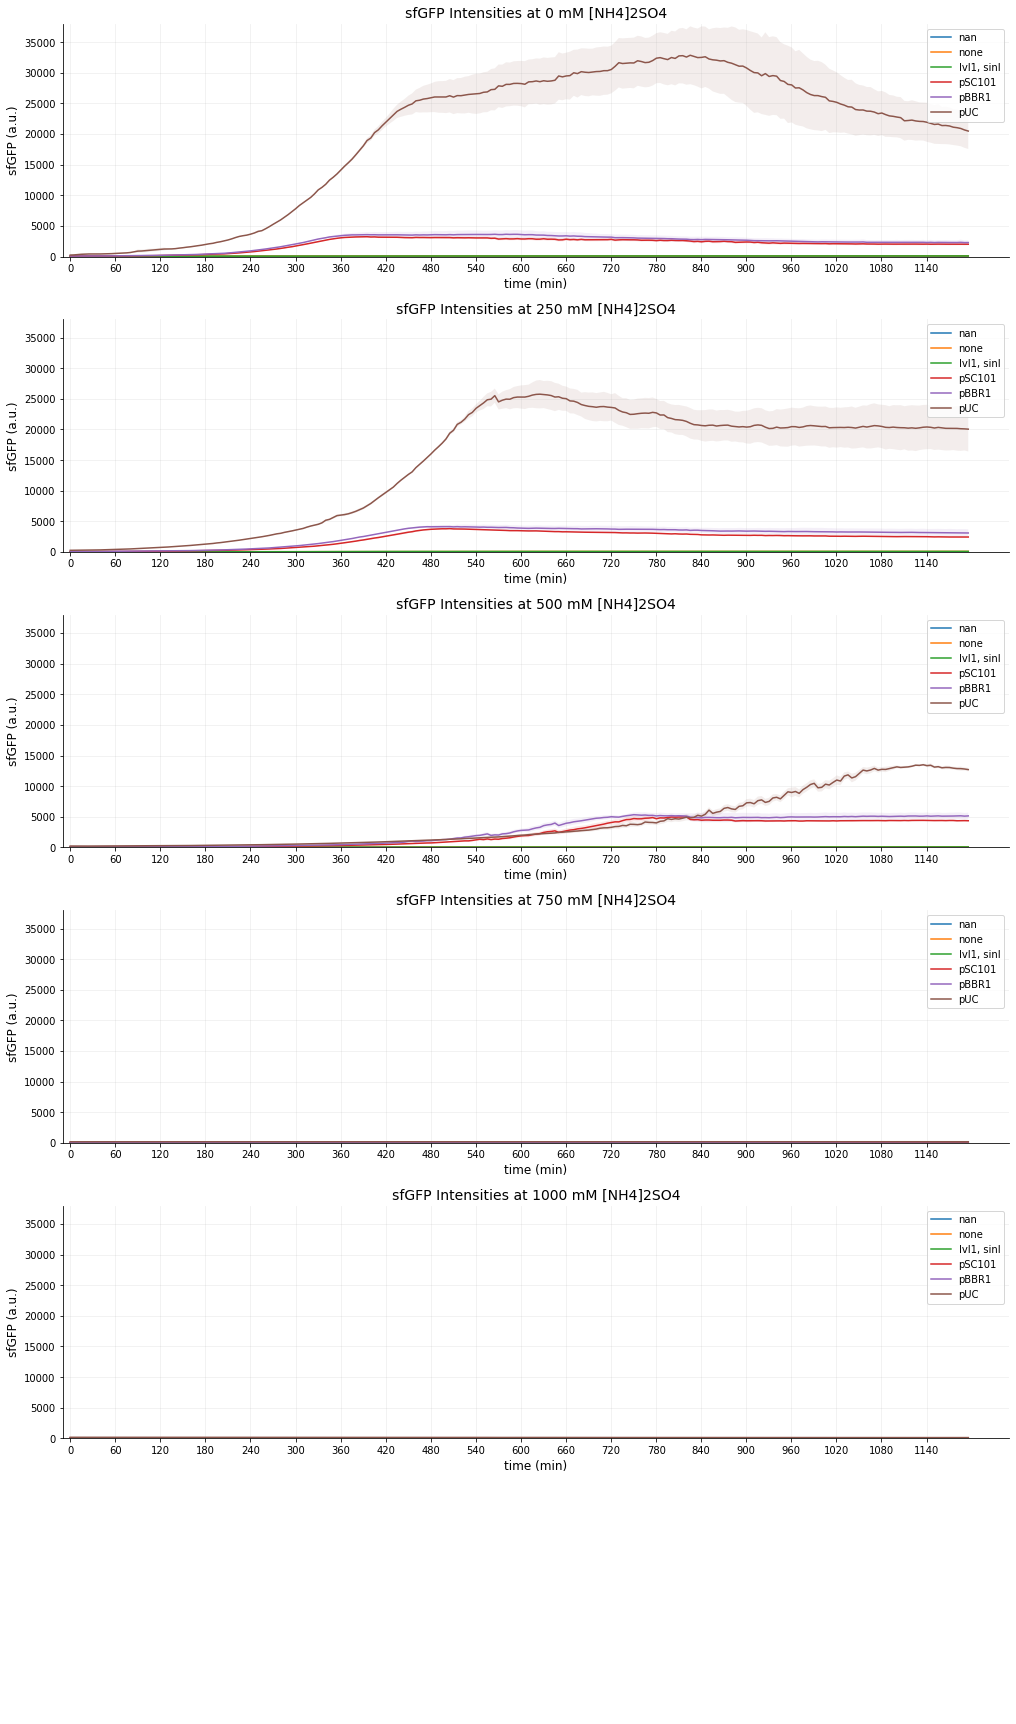

In [15]:
fig = plt.figure(figsize=(14,24), constrained_layout=True)
gs = gridspec.GridSpec(6,1, figure=fig)
plt.suptitle(f"")
plot_row = 0

test_df = FI_gain800_df
for conc in plate_decryption_df['[NH4]2SO4_c_mM'].unique():
    ax1= fig.add_subplot(gs[plot_row,0])
    
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
        replicate_no=3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        if plate_decryption_df.loc[run_replicate_wells[0],'name'] !='none':
            sns.lineplot(ax = ax1,
                         data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'plasmid']}")
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no) # 1.95 * np.std(y)/np.sqrt(len(x))
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

        ax1.set_title(f"sfGFP Intensities at {conc} mM [NH4]2SO4",size=14)
        ax1.set_ylabel("sfGFP (a.u.)",size=12)
        ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+1, 60.0))
        ax1.set_ylim([0,38_000])
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)

    plot_row+=1
#plt.savefig("220906_iGEM22_sfGFPcharact_test1_amm_conc_FIs_gain800.png", dpi=300)

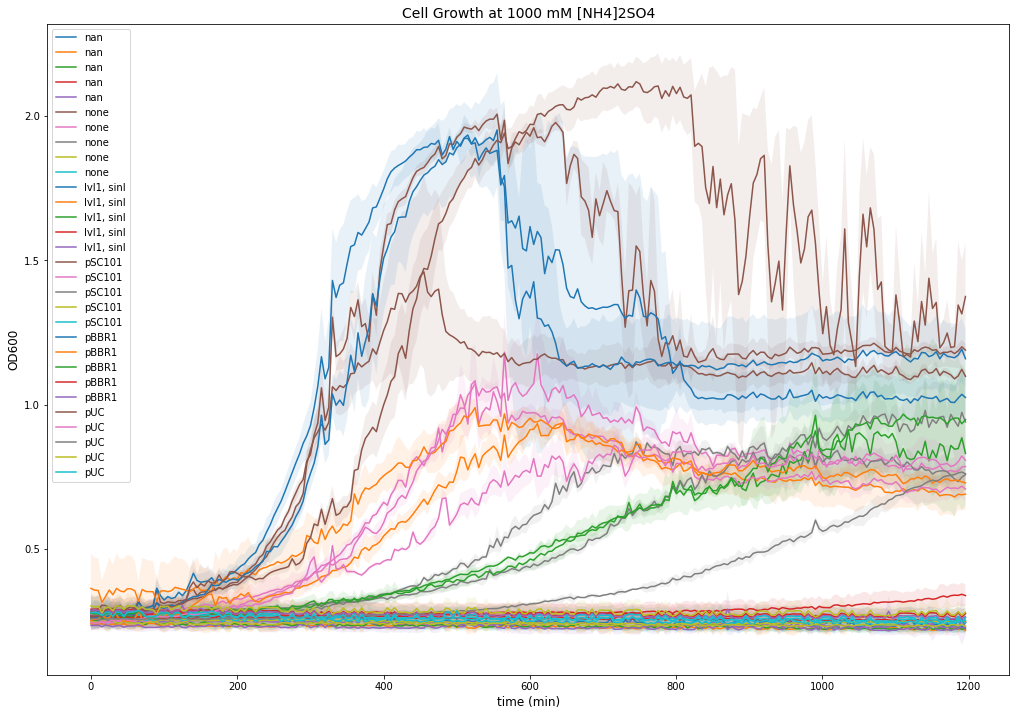

In [16]:
fig = plt.figure(figsize=(14,10), constrained_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
plt.suptitle(f"")
plot_row = 0

test_df=OD600_df

ax1= fig.add_subplot(gs[0,0])
for run_replicate_wells in divide_chunks( plate_decryption_df.index, 3 ):
    replicate_no=3
    x= test_df[run_replicate_wells].index
    y= test_df[run_replicate_wells].mean(axis=1)
    variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
    # 1- average line plot
    sns.lineplot(ax = ax1,
                 data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'plasmid']}")
    # 2- confidence interval
#     ci = 1.95 * np.std(y)/np.sqrt(len(x))
#     ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)
    ci = 2 * np.sqrt( variance_per_timepoint/replicate_no) # 1.95 * np.std(y)/np.sqrt(len(x))
    ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

    ax1.set_title(f"Cell Growth at {conc} mM [NH4]2SO4",size=14)
    ax1.set_ylabel(f"OD600",size=12)
    ax1.set_xlabel(f"time (min)",size=12)
    


## ANOVA Analysis - OD600

In [17]:
means_zero_amm = {}
var_zero_amm = {}
for run_replicate_wells in divide_chunks( data_by_am_c_dict[0].index, 3 )[1:]:
    exemplary_well_name = run_replicate_wells[0]
    means_zero_amm[data_by_am_c_dict[0].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[0].index][run_replicate_wells].rolling(1).mean().mean(axis=1)
    var_zero_amm[data_by_am_c_dict[0].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[0].index][run_replicate_wells].rolling(1).mean().var(axis=1)
means_zero_amm_df = pd.DataFrame(means_zero_amm)
var_zero_amm_df = pd.DataFrame(var_zero_amm)
var_pooled = var_zero_amm_df.mean(axis=1)
var_of_means = means_zero_amm_df.var(axis=1)
F_over_time = (3*var_of_means)/var_pooled

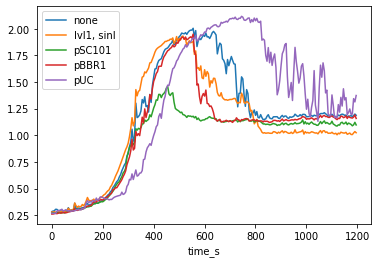

In [18]:
means_zero_amm_df.plot()

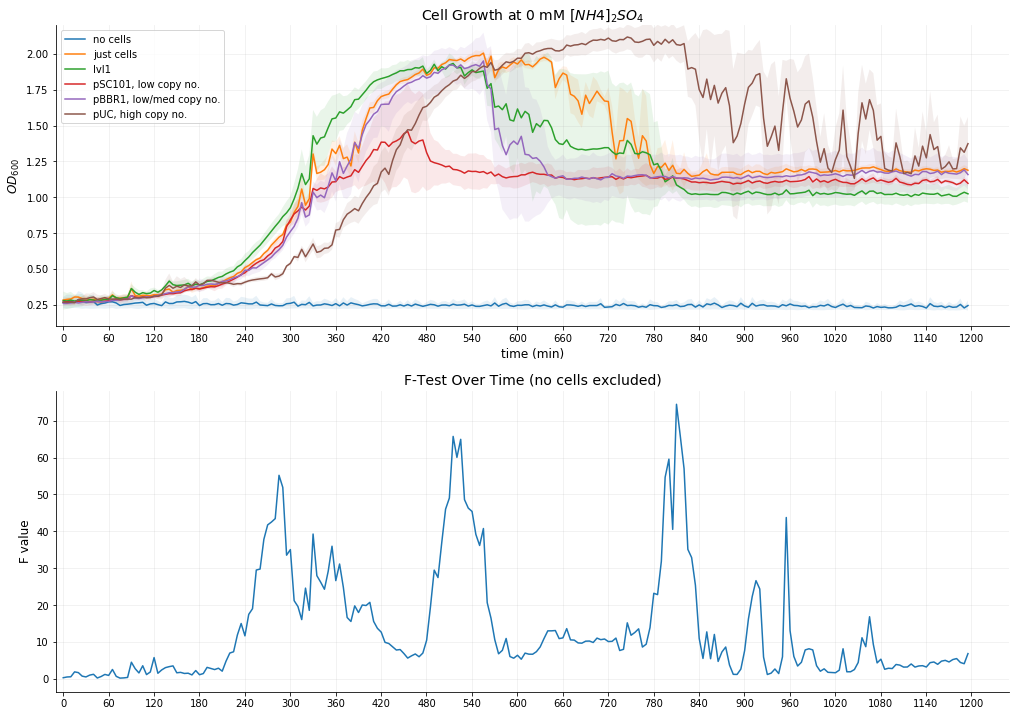

In [19]:
fig = plt.figure(figsize=(14,10), constrained_layout=True)
gs = gridspec.GridSpec(2,1, figure=fig)
plt.suptitle(f"")
plot_row = 0

test_df = OD600_df
for conc in [plate_decryption_df['[NH4]2SO4_c_mM'].unique()[0]]:
    ax1= fig.add_subplot(gs[0,0])
    
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
        replicate_no = 3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}") # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

        ax1.set_title(f"Cell Growth at {conc} mM $[NH4]_{2}$$SO_{4}$",size=14)
        ax1.set_ylabel("$OD_{600}$",size=12)
        ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+60, 60.0))
        ax1.set_ylim([0.1,2.2])
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)

ax2= fig.add_subplot(gs[1,0]) 
sns.lineplot(ax = ax2,
                     data = F_over_time)#, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}")

ax2.set_title(f"F-Test Over Time (no cells excluded)",size=14)
ax2.set_ylabel("F value",size=12)
ax1.set_xlabel(f"time (min)",size=12)
plt.xticks(np.arange(min(x), max(x)+60, 60.0))
#ax2.set_ylim([0.1,2.2])
ax2.set_xlim([-10,1250])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.grid(True,alpha=0.2)
#plt.savefig("220906_iGEM22_sfGFPcharact_test1_amm_conc_growth_curves.png", dpi=300)

In [51]:
plate_decryption_df['[NH4]2SO4_c_mM'].unique()[1]

250

In [60]:
@interact
def show_moving_average (window_x=(1,10)):
    
    # ANPVA
    means_zero_amm = {}
    var_zero_amm = {}
    sample_names = []
    concentration_investigated = 1000
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[concentration_investigated].index, 3 )[1:]:
        exemplary_well_name = run_replicate_wells[0]
        sample_names.append(data_by_am_c_dict[concentration_investigated].loc[exemplary_well_name].plasmid)
        means_zero_amm[data_by_am_c_dict[concentration_investigated].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[concentration_investigated].index][run_replicate_wells].rolling(window_x).mean().mean(axis=1)
        var_zero_amm[data_by_am_c_dict[concentration_investigated].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[concentration_investigated].index][run_replicate_wells].rolling(window_x).mean().var(axis=1)
    means_zero_amm_df = pd.DataFrame(means_zero_amm)
    var_zero_amm_df = pd.DataFrame(var_zero_amm)
    var_pooled = var_zero_amm_df.mean(axis=1)
    var_of_means = means_zero_amm_df.var(axis=1)
    F_over_time = (3*var_of_means)/var_pooled
    
    fig = plt.figure(figsize=(14,10), constrained_layout=True)
    gs = gridspec.GridSpec(2,1, figure=fig)
    plt.suptitle(f"\nCambridge iGEM22 JUMP LVL1 DV Characterisation Project | $[NH4]_{2}$$SO_{4}$ Factors | 06.09.2022",size=16)
    plot_row = 0
    
    test_df = OD600_df
    for conc in [concentration_investigated]:
        
        ax1= fig.add_subplot(gs[0,0])

        for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
            replicate_no = 3
            x= test_df[run_replicate_wells].index
            y= test_df[run_replicate_wells].mean(axis=1)
            variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
            # 1- average line plot
            sns.lineplot(ax = ax1,
                         data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}") # 1.95 * np.std(y)/np.sqrt(len(x))
            # 2- confidence interval
            ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
            ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

            ax1.set_title(f" Cell Growth at {conc} mM $[NH4]_{2}$$SO_{4}$",size=14)
            ax1.set_ylabel("$OD_{600}$",size=12)
            ax1.set_xlabel(f"time (min)",size=12)
            plt.xticks(np.arange(min(x), max(x)+60, 60.0))
            ax1.set_ylim([0.1,2.2])
            ax1.set_xlim([-10,1250])
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            plt.grid(True,alpha=0.2)

    ax2= fig.add_subplot(gs[1,0]) 
    sns.lineplot(ax = ax2,
                 data = F_over_time)#, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}")
    critical_value=11.283
    ax2.fill_between(x, (F_over_time), critical_value, alpha=.6, color='coral',where=F_over_time>critical_value)
    
    ax2.set_title(f"F-Test Timeseries ('no cells' excluded) - rolling average {window_x*5} min {['DH5⍺ alone','LVL1 neg. control']+sample_names[2:]}",size=14)
    ax2.set_ylabel("F value",size=12)
    ax2.set_xlabel(f"time (min)",size=12)
    plt.xticks(np.arange(min(x), max(x)+60, 60.0))
    ax2.set_ylim([-2.1,75.])
    ax2.set_xlim([-10,1250])
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    plt.grid(True,alpha=0.2)
    plt.hlines(11.283,0,12_000,color='red',linestyle='--')
    plt.text(950, 14, 'Critical F value for 0.1% = 11.283\n(5 samples & 3 replicates)', fontsize = 12, 
         bbox = dict(facecolor = 'white', edgecolor='white',alpha = 0.5),color='red')
    plt.savefig(f"220906_iGEM22_sfGFPcharact_test1_ammconc{concentration_investigated}_Fvalue_averages_{window_x*5}min.pdf", dpi=300)
    plt.show()

interactive(children=(IntSlider(value=5, description='window_x', max=10, min=1), Output()), _dom_classes=('wid…

In [38]:
F_over_time[]

0.3231841207398414